<a href="https://colab.research.google.com/github/vddavydova/colab/blob/main/example_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пример анализа кейса про кольцо

## Загрузка данных и необходимых библиотек

In [ ]:
 #pip install pandas matplotlib numpy seaborn scikit-learn klearn statistics statsmodels scipy

In [ ]:
## команды для установки директории

#import `os` 
import os

# retrieve current working directory (`cwd`)
cwd = os.getcwd()
cwd

# change directory 
os.chdir("C:/Users/Виолетта")

# list all files and directories in current directory
#os.listdir('.')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math
import statistics 
import scipy.stats
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot

In [ ]:
plt.style.use('ggplot')  #красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  #размер картинок

In [ ]:
#чтение датасета
data = pd.read_csv('./data.csv', sep=';', encoding='latin1')

In [ ]:
#названия столбцов в дадасете
data.head()

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.0,1.10,Ideal,H,SI1,VG,EX,GIA,5169.0
1,2.0,0.83,Ideal,H,VS1,ID,ID,AGSL,3470.0
2,3.0,0.85,Ideal,H,SI1,EX,EX,GIA,3183.0
3,4.0,0.91,Ideal,E,SI1,VG,VG,GIA,4370.0
4,5.0,0.83,Ideal,G,SI1,EX,EX,GIA,3171.0


In [ ]:
#просмотр столбцов и пропущенных значений датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6026 entries, 0 to 6025
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   float64
 1   Carat Weight  6000 non-null   float64
 2   Cut           6000 non-null   object 
 3   Color         5999 non-null   object 
 4   Clarity       6000 non-null   object 
 5   Polish        6000 non-null   object 
 6   Symmetry      5999 non-null   object 
 7   Report        6000 non-null   object 
 8   Price         4500 non-null   float64
dtypes: float64(3), object(6)
memory usage: 423.8+ KB


В данном случае обращаем внимание на то, с какой теперь строки отсутсвуют цены.

In [ ]:
# данные анализируются до строки 4502, далее - строки для прогнозных значений

data[:4502]

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.0,1.10,Ideal,H,SI1,VG,EX,GIA,5169.0
1,2.0,0.83,Ideal,H,VS1,ID,ID,AGSL,3470.0
2,3.0,0.85,Ideal,H,SI1,EX,EX,GIA,3183.0
3,4.0,0.91,Ideal,E,SI1,VG,VG,GIA,4370.0
4,5.0,0.83,Ideal,G,SI1,EX,EX,GIA,3171.0
...,...,...,...,...,...,...,...,...,...
4497,4498.0,0.90,Very Good,D,SI1,VG,G,GIA,4497.0
4498,4499.0,1.21,Very Good,G,SI1,VG,VG,GIA,6439.0
4499,4500.0,1.50,Signature-Ideal,I,IF,ID,ID,AGSL,12725.0
4500,4501.0,1.08,Very Good,F,VS2,G,VG,GIA,NaN


In [ ]:
#заменим значение "Not Available" в данных на «не число» (np.nan — «not a number»), 
#которое Python все же интерпретирует как число.
data = data.replace({'Not Available': np.nan})
data[:4502]

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.0,1.10,Ideal,H,SI1,VG,EX,GIA,5169.0
1,2.0,0.83,Ideal,H,VS1,ID,ID,AGSL,3470.0
2,3.0,0.85,Ideal,H,SI1,EX,EX,GIA,3183.0
3,4.0,0.91,Ideal,E,SI1,VG,VG,GIA,4370.0
4,5.0,0.83,Ideal,G,SI1,EX,EX,GIA,3171.0
...,...,...,...,...,...,...,...,...,...
4497,4498.0,0.90,Very Good,D,SI1,VG,G,GIA,4497.0
4498,4499.0,1.21,Very Good,G,SI1,VG,VG,GIA,6439.0
4499,4500.0,1.50,Signature-Ideal,I,IF,ID,ID,AGSL,12725.0
4500,4501.0,1.08,Very Good,F,VS2,G,VG,GIA,NaN


## Преобразование данных: удаление неккоректных значений и переименование столбцов в датасете

In [ ]:
# строки, в которых вес больше 3х
v_Carat_Weight=data.loc[data['Carat Weight'] > 3]
print(v_Carat_Weight)

          ID  Carat Weight        Cut Color Clarity Polish Symmetry Report  \
1888  1889.0       10002.0  Very Good     D     SI1     VG       VG    GIA   
1948  1949.0        5500.0      Ideal     D     SI1     EX       EX    GIA   

          Price  
1888     0.0055  
1948  3605.0000  


In [ ]:
#data=data.drop(data[data_analysis['Carat Weight'] > 3].index)

Нет оснований избавляться от подобных значений. 

In [ ]:
data.loc[data['Cut'] == 'ssssssssss']

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
1994,1995.0,1.01,ssssssssss,G,SI1,VG,G,GIA,4805.0


In [ ]:
data=data.drop(data[data['Cut'] == 'ssssssssss'].index)

In [ ]:
data.loc[data['Cut'] == 'Ideallll']

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
1219,1220.0,1.67,Ideallll,D,SI1,G,VG,GIA,14154.0


In [ ]:
data=data.drop(data[data['Cut'] == 'Ideallll'].index)

## Предварительный анализ данных: описательная статистика

В данном разделе предварительный анализ данных будет заключаться в расчете описательной статистики.

Далее анализ наиболее часто встречающихся значений - мода.

In [ ]:
# иное название для удобства
data=data.rename(columns={'Carat Weight': 'Carat_Weight'})

In [ ]:
data['Carat_Weight'].value_counts()

1.01    447
0.90    373
1.00    285
2.01    247
1.02    190
       ... 
2.81      1
2.73      1
1.83      1
1.82      1
2.76      1
Name: Carat_Weight, Length: 198, dtype: int64

In [ ]:
data['Cut'].value_counts()

Ideal              2479
Very Good          2428
Good                707
Signature-Ideal     253
Fair                129
-                     2
Name: Cut, dtype: int64

In [ ]:
data['Color'].value_counts()

G    1500
H    1079
F    1012
I     967
E     778
D     660
-       1
Name: Color, dtype: int64

In [ ]:
data['Clarity'].value_counts()

SI1     2057
VS2     1574
VS1     1192
VVS2     666
VVS1     285
IF       219
FL         4
           1
Name: Clarity, dtype: int64

In [ ]:
data['Polish'].value_counts()

EX    2425
VG    2408
ID     595
G      569
ÍÄ       1
Name: Polish, dtype: int64

In [ ]:
data['Symmetry'].value_counts()

VG    2415
EX    2059
G      914
ID     608
         1
Name: Symmetry, dtype: int64

In [ ]:
data['Report'].value_counts()

GIA     5264
AGSL     734
Name: Report, dtype: int64

In [ ]:
data['Price'].value_counts()

4058.0     5
8014.0     5
5408.0     5
4905.0     5
5452.0     5
          ..
3872.0     1
10598.0    1
6726.0     1
10964.0    1
14206.0    1
Name: Price, Length: 3789, dtype: int64

Таким образом, имеем следующие данные:
1. вес карата - 1.01; 
2. огранка - идеальная; 
3. цвет - почти бесцветные, при этом цвет обнаруживается при сравнении с бриллиантами высшего качества;
4. чистота - незначительные включения (по пирамиде качества чистоты);
5. полировка - очень хорошая;
6. качество семметрии - очень хорошая;
7. геммологическая лаборотория - значительное преобладание Геммологического института Америки;
8. цена - от 5000 до 8000 долларов.

На основе полученных результатов с учетом того, что оценка бриллиантов зависит от четырех основных критериев, 
известных как "четыре С" можно сделать выводы о том, что,как правило, распространены камни весом одного карата, при этом наиболее популярна огранка категории относительно максимального светопреломления в камнях круглой огранки,
по цвету - почти бесцветные или ювелирные, 
по чистоте - второе с конца по пирамиде качества, что определяется как незначительные включения минеральных отложений и различных неоднородностей.
Также важно не оставить без внимания и инфе факторы, влияющие на стоимость камней. Так симметрия огранки и полировка поверхностей, влияющие на отражение/преломление света распространена досточно выского качества. 
Большинство бриллиантов ювелирного качества имеют классификационные сертификаты, выданные Геммологического института Америки в Северной Америки. 
И наконец, наиболее распространенная цена на бриллианты составляет в диапозоне от 5000 до 8000 долларов, что является значительным показателем для Грега.

Далее рассмотрена описательная статистика только для цены и веса камня.

In [ ]:
data['Price'].describe()

count      4498.000000
mean      11674.280800
std       10069.545291
min      -10001.000000
25%        5126.250000
50%        7868.500000
75%       14952.250000
max      101561.000000
Name: Price, dtype: float64

Среднее значение говорит нам, что «типичная» цена в датасете равна примерно 11675.49. Соответственно, большинство камней стоят достаточно дорого. 

Медианная цена камня составляет 7868 долларов. 
Это предполагает, что как минимум у половины камней в датасете цена равна или ниже 7871 долларов.

Отрицательность минимального значения говорит о некорректности данных, поэтому необходимо избавится от подобных значений.

Избавимся от некорректных значений цены.

In [ ]:
data=data.drop(data[data.Price <= 0].index)

In [ ]:
data['Carat_Weight'].describe()

count     5996.000000
mean         3.919528
std        147.376231
min          0.750000
25%          1.000000
50%          1.130000
75%          1.590000
max      10002.000000
Name: Carat_Weight, dtype: float64

Выводы по размеру камня: средний вес камня - 4.8; максимальный размер - 10002, что свидетельствует о наличии выброса относительно минимального и среднего значений; медианный размер камня - 1.13, т.е. как минимум у половины камней в датасете вес составляет 1.13 карата.

## Предварительный анализ данных: графическое представление

<AxesSubplot:>

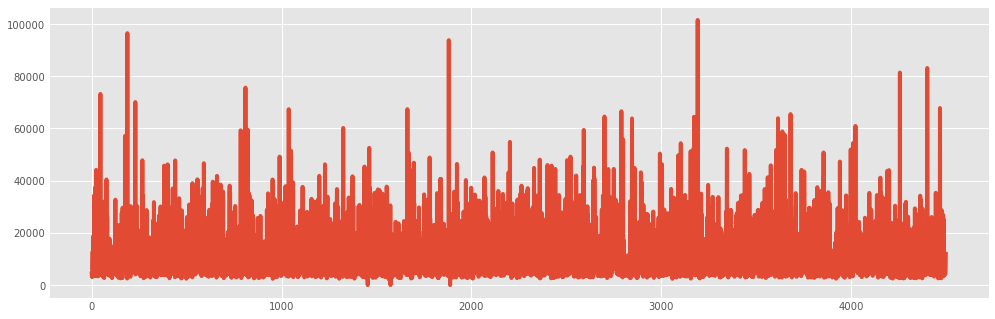

In [ ]:
data['Price'].plot()

На основе данного графика можно преположить, что в датасете есть выбросы, а также он указывает, что отрицательные значения цены были удалены.

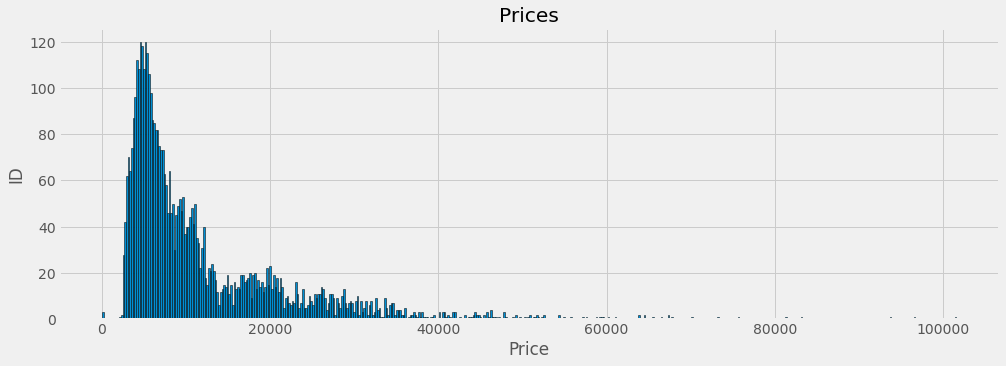

In [ ]:
#гистограмма цены
plt.style.use('fivethirtyeight')
plt.hist(data['Price'].dropna(), bins = 500, edgecolor = 'k');
plt.xlabel('Price'); plt.ylabel('ID');
plt.title('Prices');